# Assignment 6: Vishal Prasad(18210095)

In [42]:
import numpy as np
import pandas as pd
df = pd.read_csv("irisself.txt") # Import data
df=df.sample(frac=1)
df2=df.iloc[1:100,[0,3,4]]
inp=df2.iloc[:,[0,1]]
inp.head()
out=df2.iloc[:,2]
test_in=df.iloc[101:150,[0,3]]
test_out=df.iloc[101:150,-1]
#df.head(-1)

In [2]:
def get_mean_vari_matrix(df2):

    #print(df)
    uni,count=np.unique(df2.iloc[:,-1],return_counts=True)
    global probab
    probab=count/np.sum(count)
    #print(probab)
    #print(count)
    list1=[]
    list2=[]
    list3=[]
    for y in range(len(df2)):
            if ((df2.iloc[y,-1])==uni[0]):
                list1.append(df2.iloc[y,:])
            if ((df2.iloc[y,-1])==uni[1]):
                list2.append(df2.iloc[y,:])
            if ((df2.iloc[y,-1])==uni[2]):
                list3.append(df2.iloc[y,:])
    d1=pd.DataFrame(list1)
    d2=pd.DataFrame(list2)
    d3=pd.DataFrame(list3)
    m10=np.mean(d1.iloc[:,0])
    v10=np.var(d1.iloc[:,0])
    m11=np.mean(d1.iloc[:,1])
    v11=np.var(d1.iloc[:,1])

    m20=np.mean(d2.iloc[:,0])
    v20=np.var(d2.iloc[:,0])
    m21=np.mean(d2.iloc[:,1])
    v21=np.var(d2.iloc[:,1])

    m30=np.mean(d3.iloc[:,0])
    v30=np.var(d3.iloc[:,0])
    m31=np.mean(d3.iloc[:,1])
    v31=np.var(d3.iloc[:,1])

    mean=np.array([[m10,m11],[m20,m21],[m30,m31]])
    vari=np.array([[v10,v11],[v20,v21],[v30,v31]])
    return mean,vari

In [3]:
mean,vari=get_mean_vari_matrix(df2)
print(mean,vari)

[[5.03529412 0.25294118]
 [6.07096774 1.30967742]
 [6.68823529 2.08235294]] [[0.1416955  0.01366782]
 [0.20915713 0.03248699]
 [0.35397924 0.04557093]]


#### This is the working example

In [4]:
def gaussian_calc3(x,mean,sigma,uni,probab):
    #t=np.array([[1],[1],[1]])
    t1=1
    t2=1
    t3=1
    #for i in range(0,3):
    for r in range(0,2):
        t1=t1*(1/np.sqrt(2*math.pi*((sigma[0,r])**2)))*(np.exp(-((x[r]-mean[0,r])**2)/(2*(sigma[0,r])**2)))
        t2=t2*(1/np.sqrt(2*math.pi*((sigma[1,r])**2)))*(np.exp(-((x[r]-mean[1,r])**2)/(2*(sigma[1,r])**2)))
        t3=t3*(1/np.sqrt(2*math.pi*((sigma[2,r])**2)))*(np.exp(-((x[r]-mean[2,r])**2)/(2*(sigma[2,r])**2)))
    temp=[]
    temp.extend([t1,t2,t3])
    temp=temp*probab
    #print(temp)
    indi=np.argmax(temp)
    out=uni[indi]
    return out,max(temp)

In [5]:
import math
uni,count=np.unique(out,return_counts=True)
d=np.array([5.0,0.6])
gaussian_calc3(d,mean,vari,uni,probab)

('Iris-versicolor', 3.5385950472865605e-109)

In [6]:
from sklearn.metrics import accuracy_score
final_out=[]
for x in range(len(test_in)):
    temp,_=gaussian_calc3(test_in.iloc[x,:],mean,vari,uni,probab)
    final_out.append(temp)
#print(final_out)
accuracy_score(test_out,final_out)

0.8979591836734694

## Qn No:1(b) 

In [7]:
#print(df)
train=df.iloc[1:16,[0,3,4]]
train.head()
pool=df.iloc[16:106,[0,3,4]]
pool.head()
test=df.iloc[106:150,[0,3,4]]

In [8]:
mean2,vari2=get_mean_vari_matrix(train)

In [9]:
def get_min_confidence(train,pool):
    mean2,vari2=get_mean_vari_matrix(train.iloc[:,-1],train)
    uni2,count2=np.unique(train.iloc[:,-1],return_counts=True)
    global probab2
    probab2=count2/np.sum(count2)
    final_list=[]
    max_prob=[]
    for x in range (len(pool)):
        temp,max_prob_temp=gaussian_calc3(pool.iloc[x,[0,1]],mean2,vari2,uni2,probab2)
        max_prob.append(max_prob_temp)
    #print(max_prob)
    a=np.argmin(max_prob)
    
    #print(max_prob[a])
    return a

In [10]:
 def new_train_pool_df(train,pool):
    #print(pool.shape)
    mean2,vari2=get_mean_vari_matrix(train)
    uni2,count2=np.unique(train.iloc[:,-1],return_counts=True)
    global probab2
    probab2=count2/np.sum(count2)
    final_list=[]
    max_prob=[]
    for x in range (len(pool)):
        temp,max_prob_temp=gaussian_calc3(pool.iloc[x,[0,1]],mean2,vari2,uni2,probab2)
        max_prob.append(max_prob_temp)
    #print(max_prob)
    a=np.argmin(max_prob)
    temp=pool.iloc[a,[0,1,2]]
    pool=pool.reset_index(drop=True)
    pool2=pool.drop(a)
    print(pool2.shape)
    train2=train.append(temp)
    train2=train2.reset_index(drop=True)
    print(train2.shape)
    #pool.head()
    return train2,pool2,temp

In [11]:
a1,b1,c1=new_train_pool_df(train,pool)
print(c1)

(89, 3)
(16, 3)
SepalLength               5.8
PetalWidth                2.4
label          Iris-virginica
Name: 114, dtype: object


(89, 3)
(16, 3)


F:\Anacondaa\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anacondaa\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anacondaa\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(88, 3)
(17, 3)
(87, 3)
(18, 3)
(86, 3)
(19, 3)
(85, 3)
(20, 3)
(84, 3)
(21, 3)
(83, 3)
(22, 3)
(82, 3)
(23, 3)
(81, 3)
(24, 3)
(80, 3)
(25, 3)
[[5.8 2.4 'Iris-virginica']
 [4.3 0.1 'Iris-setosa']
 [5.0 0.4 'Iris-setosa']
 [5.1 0.5 'Iris-setosa']
 [5.0 0.6 'Iris-setosa']
 [5.5 1.0 'Iris-versicolor']
 [5.7 1.0 'Iris-versicolor']
 [7.2 2.5 'Iris-virginica']
 [5.8 0.2 'Iris-setosa']
 [4.8 0.1 'Iris-setosa']]


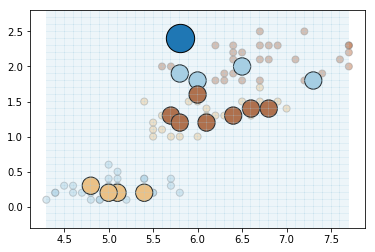

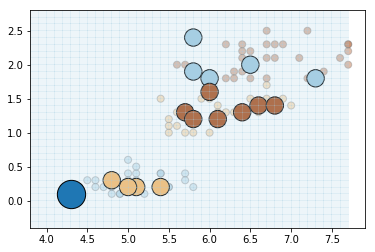

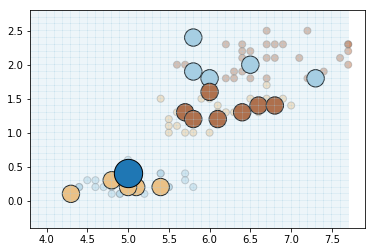

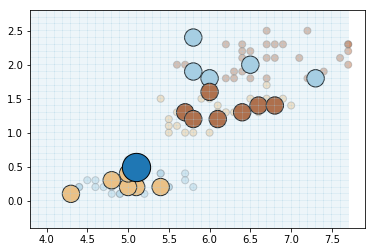

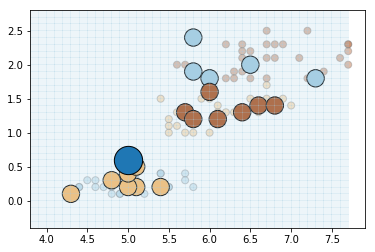

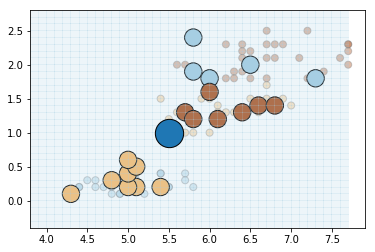

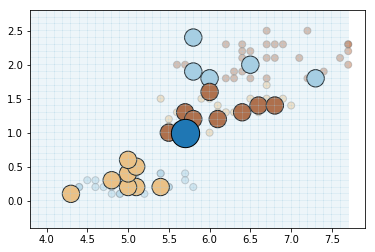

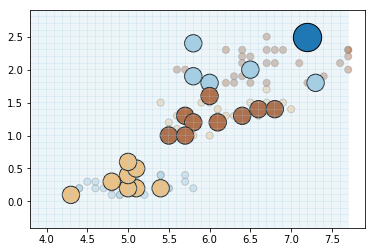

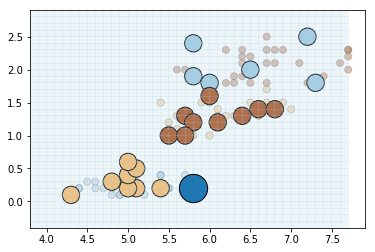

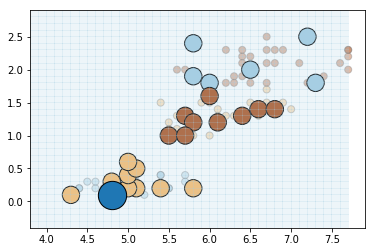

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
import os
n=0
path=os.getcwd()
a=train
b=pool
min_cp=[]
mesh=[]
X0=np.zeros([50,11])
X1=np.zeros([50,11])
X2=np.zeros([50,11])
for i in range(1,11):
    result1=[]
    a,b,mcp=new_train_pool_df(a,b)
    mcp=np.asarray(mcp)
    min_cp.append(mcp)
    #print(a.shape)
    final_out=[]
    m2,v2=get_mean_vari_matrix(a)
    u2,c2=np.unique(a.iloc[:,-1],return_counts=True)
    p2=c2/np.sum(c2)
    for x in range(len(test_in)):
        temp2,_=gaussian_calc3(test_in.iloc[x,:],m2,v2,u2,p2)
        final_out.append(temp2)
        #print(final_out)
    
    x_min, x_max = a.iloc[:,0].values.min() - .5, a.iloc[:,0].max() + .5
    y_min, y_max = a.iloc[:,1].min() - .5, a.iloc[:,1].max() + .5
    h = 0.1  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz=np.c_[xx.ravel(),yy.ravel()]
    zz=pd.DataFrame(zz,columns=['SepalLength','PetalWidth'])
    
    for x in range(zz.shape[0]):
        temp3,_=gaussian_calc3(zz.iloc[x,:],m2,v2,u2,p2)
        result1.append(temp2)
        
        #print(final_out)
    S=np.array(result1)
    S=labelencoder.fit_transform(S)
    S=S.reshape(xx.shape)
    mesh.append(S)
    ndata=df2.copy()
    ndata.iloc[:,-1]=labelencoder.fit_transform(df2.iloc[:,-1])
    
    ntrain_data=a.copy()
    ntrain_data.iloc[:,-1]=labelencoder.fit_transform(a.iloc[:,-1])
    
    x=a.copy(deep=True)
    x.label[x.label == 'Iris-virginica'] = 0
    x.label[x.label == 'Iris-setosa'] = 1
    x.label[x.label == 'Iris-versicolor'] = 2
    #print(a)
    #print(mcp)
    #X_0[:,i]=x.iloc[:,0]
    X0[0:len(x),i]=x.iloc[:,0]
    X1[0:len(x),i]=x.iloc[:,1]
    X2[0:len(x),i]=x.iloc[:,2]
    #plt.scatter(x.iloc[:,0],x.iloc[:,1],c=x.iloc[:,2])
    #plt.scatter(mcp[0],mcp[1],marker='X')
    
    plt.figure()
    plt.scatter(df2.iloc[:,0], df2.iloc[:,1],c=ndata.iloc[:,-1], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
    plt.scatter(a.iloc[:,0], a.iloc[:,1],c=x.iloc[:,-1],cmap=plt.cm.Paired, edgecolors='k', s=300 )
    plt.pcolormesh(xx, yy, S, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(mcp[0],mcp[1],cmap=plt.cm.Paired, edgecolors='k', s=800 )
    #plt.show()
    
    file='file'+str(n)
    path_=os.path.join(path,file)
    plt.savefig(path_)
    n=n+1
    
    '''
    plt.scatter(df2.iloc[:,0], df2.iloc[:,1], alpha=0.4,c='y', cmap=plt.cm.Paired, edgecolors='grey', s=50 )
    plt.scatter(a.iloc[:,0], a.iloc[:,1],cmap=plt.cm.Paired, edgecolors='k', s=300 )
    plt.pcolormesh(xx, yy, S, cmap=plt.cm.Paired, alpha=0.2)
    #plt.scatter(irpp.iloc[ind,0], irpp.iloc[ind,1],cmap=plt.cm.Paired, edgecolors='k', s=800 )
    plt.scatter(mcp[0],mcp[1],cmap=plt.cm.Paired, edgecolors='k', s=800 )
    plt.show()

    #plt.scatter(mcp.iloc[0,0]
    #plt.scatter(x.iloc[:,0],x.iloc[:,1],c=x.iloc[:,2],marker="s")
    
    plt.show()
    '''
    '''
    filename='file'+str(i)+'.png'
    plt.savefig(filename, dpi=96)
    #plt.gca()
    '''
    #print(accuracy_score(test_out,final_out))
min_cp=np.asarray(min_cp)
min_cp=np.reshape(min_cp,[-1,3])
print(min_cp)



In [41]:
names=['file'+str(i)+'.png' for i in range(2,11)]
print(names)
# saving image as gif
from PIL import Image
for i in range(1,9):
    im = Image.open(names[i])
    #im.show()
    a=names[i].split('.')
    print(a)
    im.save(a[0]+'.gif')
names=['file'+str(i)+'.gif' for i in range(1,10)]
print(names)
# creating gif
images = []
for n in names:
    frame = Image.open(n)
    images.append(frame)

# Save the frames as an animated GIF
images[0].save('iris.gif',
               save_all=True,
               append_images=images[1:],
               duration=1000,
               loop=0)


['file2.png', 'file3.png', 'file4.png', 'file5.png', 'file6.png', 'file7.png', 'file8.png', 'file9.png', 'file10.png']
['file3', 'png']
['file4', 'png']
['file5', 'png']
['file6', 'png']
['file7', 'png']
['file8', 'png']
['file9', 'png']
['file10', 'png']
['file1.gif', 'file2.gif', 'file3.gif', 'file4.gif', 'file5.gif', 'file6.gif', 'file7.gif', 'file8.gif', 'file9.gif']


In [18]:
names=['step'+str(i)+'.png' for i in range(1,11)]
print(names)
 # saving image as gif
from PIL import Image
for i in range(1,10):
    print(i)
    im = Image.open(names[i])
    #im.show()
    a=names[i].split('.')
    print(a)
    im.save(a[0]+'.gif')
names=['step'+str(i)+'.gif' for i in range(1,10)]
print(names)
# creating gif
images = []
for n in names:
    frame = Image.open(n)
    images.append(frame)

# Save the frames as an animated GIF
images[0].save('iris.gif',
               save_all=True,
               append_images=images[1:],
               duration=1000,
               loop=0)


['step1.png', 'step2.png', 'step3.png', 'step4.png', 'step5.png', 'step6.png', 'step7.png', 'step8.png', 'step9.png', 'step10.png']
1
['step2', 'png']
2
['step3', 'png']
3
['step4', 'png']
4
['step5', 'png']
5
['step6', 'png']
6
['step7', 'png']
7
['step8', 'png']
8
['step9', 'png']
9
['step10', 'png']
['step1.gif', 'step2.gif', 'step3.gif', 'step4.gif', 'step5.gif', 'step6.gif', 'step7.gif', 'step8.gif', 'step9.gif']


In [76]:
#### EXTRAAA ONE

In [ ]:
### DO NOT TOUCH THIS ONE
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Image

#Plot the contour
fig1, ax1 = plt.subplots(1)
#fig1.addsubplot(111)
#ax1.contour(T0, T1, Z, 100, cmap = 'jet')
#ax1.scatter(test_in.iloc[:,0],test_in.iloc[:,1])
ax1.scatter(x.iloc[:,0],x.iloc[:,1],c=x.iloc[:,2])
min1=min_cp[:,0]
min2=min_cp[:,1]

# Create animation
line, = ax1.plot([], [], 'r', label = 'Stochastic Gradient descent', lw = 1.5)
point, = ax1.plot([], [], '*', color = 'red', markersize = 40)
value_display = ax1.text(0.02, 0.02, '', transform=ax1.transAxes)

def init_1():
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')
    

    return line, point, value_display

def animate_1(i):
    # Animate line
    #line.set_data(theta0[:i], theta1[:i])
    # Animate points
    point.set_data(min1[i], min2[i])
    
    #ax2.plot([1,3,6],[theta0[i]+theta1[i],theta0[i]+3*theta1[i],theta0[i]+6*theta1[i]])


    # Animate value display
    value_display.set_text('Min = ' )

    return line, point, value_display
ax1.legend(loc = 1)

anim1 = animation.FuncAnimation(fig1, animate_1, init_func=init_1,
                               frames=len(min1), interval=1000, 
                               repeat_delay=100, blit=True)
#plt.show()
HTML(anim1.to_jshtml())
#HTML(anim2.to_jshtml())


# Edit this one : Extra recycle bin

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Image

#Plot the contour
fig1, ax1 = plt.subplots(1)
#fig1.addsubplot(111)
#ax1.contour(T0, T1, Z, 100, cmap = 'jet')
#ax1.scatter(test_in.iloc[:,0],test_in.iloc[:,1])
ax1.scatter(x.iloc[:,0],x.iloc[:,1],c=x.iloc[:,2])
min1=min_cp[:,0]
min2=min_cp[:,1]

# Create animation
line, = ax1.plot([], [], 'r', label = 'Stochastic Gradient descent', lw = 1.5)
point, = ax1.plot([], [], '*', color = 'red', markersize = 40)
point2, = ax1.plot([], [], '*', color = 'red', markersize = 40)
value_display = ax1.text(0.02, 0.02, '', transform=ax1.transAxes)
#scat = ax1.scatter(x.iloc[:,0], x.iloc[0,1])
def init_1():
    line.set_data([], [])
    point.set_data([], [])
    point2.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate_1(i):
    # Animate line
    #line.set_data(theta0[:i], theta1[:i])
    # Animate points
    point.set_data(min1[i], min2[i])
    point2.set_data(X0[:,i], X1[:,i])
    
    #ax2.plot([1,3,6],[theta0[i]+theta1[i],theta0[i]+3*theta1[i],theta0[i]+6*theta1[i]])


    # Animate value display
    value_display.set_text('Min = ' )

    return point, point2, value_display
ax1.legend(loc = 1)

anim1 = animation.FuncAnimation(fig1, animate_1, init_func=init_1,
                               frames=len(min1), interval=1000, 
                               repeat_delay=100, blit=True)
#plt.show()
HTML(anim1.to_jshtml())
#HTML(anim2.to_jshtml())


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
a=train
b=pool
def main():
    

    min_cp=[]
    for i in range(1,11):
        a,b,mcp=new_train_pool_df(a,b)
        mcp=np.asarray(mcp)
        min_cp.append(mcp)
        #print(a.shape)
        final_out=[]
        m2,v2=get_mean_vari_matrix(a)
        u2,c2=np.unique(a.iloc[:,-1],return_counts=True)
        p2=c2/np.sum(c2)
        for x in range(len(test_in)):
            temp2,_=gaussian_calc3(test_in.iloc[x,:],m2,v2,u2,p2)
            final_out.append(temp2)
        #print(final_out)
        x=a.copy(deep=True)
        x.label[x.label == 'Iris-virginica'] = 0
        x.label[x.label == 'Iris-setosa'] = 1
        x.label[x.label == 'Iris-versicolor'] = 2
        #print(a)
        #print(mcp)
        #X_0[:,i]=x.iloc[:,0]
        scat=plt.scatter(x.iloc[:,0],x.iloc[:,1],c=x.iloc[:,2])
        #plt.scatter(mcp[0],mcp[1],marker='X')

        #plt.scatter(mcp.iloc[0,0]
        #plt.scatter(x.iloc[:,0],x.iloc[:,1],c=x.iloc[:,2],marker="s")


        numframes = 100
        numpoints = 10
        color_data = np.random.random((numframes, numpoints))
        #x, y, c = np.random.random((3, numpoints))

        fig = plt.figure()
        #scat = plt.scatter(x, y, c=c, s=100)

        ani = animation.FuncAnimation(fig, update_plot, frames=(numframes),
                          fargs=(color_data, scat))
        plt.show()

def update_plot(i, data, scat):
    scat.set_array(data[i])
    return scat,



In [ ]:
main()

In [70]:
import matplotlib.pyplot as plt
import random
acc_scr=[]
acc_scr_new=[]
for k in range(1,6):
    train=df.iloc[1:16,[0,3,4]]
    train.head()
    pool=df.iloc[16:106,[0,3,4]]
    pool.head()
    test=df.iloc[106:150,[0,3,4]]
    random.seed(k)
    for i in range(1,11):
        
        train_new,pool_new,_=new_train_pool_df(train,pool)
        index=random.randint(1,(len(pool)-1))
        temp=pool.iloc[index,[0,1,2]]
        #print(index)
        pool=pool.reset_index(drop=True)
        pool=pool.drop(index)
        #print(pool.shape)
        train=train.append(temp)
        train=train.reset_index(drop=True)
        
        #print(train.shape)
        final_out=[]
        final_out_new=[]
        m2,v2=get_mean_vari_matrix(train)
        u2,c2=np.unique(train.iloc[:,-1],return_counts=True)
        p2=c2/np.sum(c2)
        
        m2_new,v2_new=get_mean_vari_matrix(train_new)
        u2_new,c2_new=np.unique(train_new.iloc[:,-1],return_counts=True)
        p2_new=c2_new/np.sum(c2_new)
        
        
        for e in range(len(test_in)):
            temp_new,temp_new2=gaussian_calc3(test_in.iloc[e,:],m2_new,v2_new,u2_new,p2_new)
            final_out_new.append(temp_new)
            #print(final_out)
        
        acc_new=accuracy_score(test_out,final_out_new)
        acc_scr_new.append(acc_new)
        
        for x in range(len(test_in)):
            temp2,_=gaussian_calc3(test_in.iloc[x,:],m2,v2,u2,p2)
            final_out.append(temp2)
            #print(final_out)
        
        acc=accuracy_score(test_out,final_out)
        acc_scr.append(acc)
        
        
print(acc_scr)
acc_scr=np.reshape(acc_scr,(5,10))
print(acc_scr)  #print(min_cp)
np.mean(acc_scr,axis=0)

acc_scr_new=np.reshape(acc_scr_new,(5,10))
print(acc_scr_new)  #print(min_cp)


(89, 3)
(16, 3)
(88, 3)
(17, 3)
(87, 3)
(18, 3)
(86, 3)
(19, 3)
(85, 3)
(20, 3)
(84, 3)
(21, 3)
(83, 3)
(22, 3)
(82, 3)
(23, 3)
(81, 3)
(24, 3)
(80, 3)
(25, 3)
(89, 3)
(16, 3)
(88, 3)
(17, 3)
(87, 3)
(18, 3)
(86, 3)
(19, 3)
(85, 3)
(20, 3)
(84, 3)
(21, 3)
(83, 3)
(22, 3)
(82, 3)
(23, 3)
(81, 3)
(24, 3)
(80, 3)
(25, 3)
(89, 3)
(16, 3)
(88, 3)
(17, 3)
(87, 3)
(18, 3)
(86, 3)
(19, 3)
(85, 3)
(20, 3)
(84, 3)
(21, 3)
(83, 3)
(22, 3)
(82, 3)
(23, 3)
(81, 3)
(24, 3)
(80, 3)
(25, 3)
(89, 3)
(16, 3)
(88, 3)
(17, 3)
(87, 3)
(18, 3)
(86, 3)
(19, 3)
(85, 3)
(20, 3)
(84, 3)
(21, 3)
(83, 3)
(22, 3)
(82, 3)
(23, 3)
(81, 3)
(24, 3)
(80, 3)
(25, 3)
(89, 3)
(16, 3)
(88, 3)
(17, 3)
(87, 3)
(18, 3)
(86, 3)
(19, 3)
(85, 3)
(20, 3)
(84, 3)
(21, 3)
(83, 3)
(22, 3)
(82, 3)
(23, 3)
(81, 3)
(24, 3)
(80, 3)
(25, 3)
[0.8367346938775511, 0.7551020408163265, 0.7551020408163265, 0.7551020408163265, 0.7551020408163265, 0.7551020408163265, 0.7551020408163265, 0.7551020408163265, 0.7551020408163265, 0.7551020408163265,

In [73]:
a11=(np.mean(acc_scr,axis=0))
a22=(np.var(acc_scr,axis=0))
a33=acc_scr
a44=(np.mean(acc_scr_new,axis=0))
print(a44)

[0.87755102 0.86938776 0.81632653 0.82040816 0.83265306 0.85306122
 0.86938776 0.86938776 0.86938776 0.85306122]


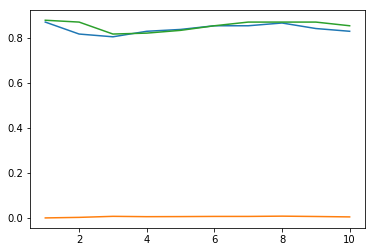

In [75]:
x=np.arange(1,11)
#print(x)
plt.plot(x,a11)
#plt.figure()
plt.plot(x,a22)
plt.plot(x,a44)
#plt.plot(x,a33)


#### I discused the assignment with shubham garg(18210111), deepanshu singh(18210027)